# Libraries

In [1]:
import dask.dataframe as dd

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import pickle
import os
import matplotlib.pyplot as plt

In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import roc_curve, roc_auc_score

In [6]:
import warnings

# Filter out specific warnings
warnings.filterwarnings("ignore")

# Your code that generates warnings

# Restore the default warning behavior
warnings.filterwarnings("default")

In [7]:
import cv2
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing

In [8]:
df = dd.read_csv('/kaggle/input/water-quality-prediction/dataset.csv')
df.head()

,Index,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,...,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature,Month,Day,Time of Day,Target
0,0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,Colorless,0.022683,0.607283,...,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324,January,29.0,4.0,0
1,1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,Faint Yellow,0.019007,0.622874,...,3.292038,8.024076e-07,284.641984,Lake,15.348981,71.220586,November,26.0,16.0,0
2,2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,Light Yellow,0.319956,0.423423,...,3.560224,7.007989e-02,570.054094,River,11.643467,44.891330,January,31.0,8.0,0
3,3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,Near Colorless,0.166319,0.208454,...,3.516907,2.468295e-02,100.043838,Ground,10.092392,60.843233,April,1.0,21.0,0
4,4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,Light Yellow,0.004867,0.222912,...,3.177849,3.296139e-03,168.075545,Spring,15.249416,69.336671,June,29.0,7.0,0


In [9]:
df['Target'].value_counts().compute()

0    4151590
1    1805252
Name: Target, dtype: int64

In [10]:
df.columns

Index(['Index', 'pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Month', 'Day', 'Time of Day',
       'Target'],
      dtype='object')

In [11]:
df = df.drop(['Index'], axis = 1)

# Train_test Split

In [12]:
rem=['Month', 'Day', 'Time of Day']

In [13]:
df1 = df.drop(rem, axis=1)

In [14]:
df1.columns

Index(['pH', 'Iron', 'Nitrate', 'Chloride', 'Lead', 'Zinc', 'Color',
       'Turbidity', 'Fluoride', 'Copper', 'Odor', 'Sulfate', 'Conductivity',
       'Chlorine', 'Manganese', 'Total Dissolved Solids', 'Source',
       'Water Temperature', 'Air Temperature', 'Target'],
      dtype='object')

In [15]:
df1['Color'].value_counts().compute()

Colorless         1787911
Near Colorless    1786234
Faint Yellow      1079772
Light Yellow       758138
Yellow             539048
Name: Color, dtype: int64

In [16]:
df1['Color'] = df1.Color.replace(['Colorless', 'Near Colorless','Faint Yellow', 'Light Yellow','Yellow'],[0,1,2,3,4])

In [17]:
df1['Source']=df1['Source'].replace(['Stream', 'Ground','Well','Aquifer','Reservoir'
,'River', 'Spring','Lake'], [0,1,2,3,4,5,6,7])

In [18]:
X = df1.drop(['Target'], axis = 1)

In [19]:
X.head()

,pH,Iron,Nitrate,Chloride,Lead,Zinc,Color,Turbidity,Fluoride,Copper,Odor,Sulfate,Conductivity,Chlorine,Manganese,Total Dissolved Solids,Source,Water Temperature,Air Temperature
0,8.332988,0.000083,8.605777,122.799772,3.713298e-52,3.434827,0.0,0.022683,0.607283,0.144599,1.626212,87.266538,471.683357,3.708178,2.269945e-15,332.118789,NaN,NaN,43.493324
1,6.917863,0.000081,3.734167,227.029851,7.849262e-94,1.245317,2.0,0.019007,0.622874,0.437835,1.686049,144.010981,432.844908,3.292038,8.024076e-07,284.641984,7.0,15.348981,71.220586
2,5.443762,0.020106,3.816994,230.995630,5.286616e-76,0.528280,3.0,0.319956,0.423423,0.431588,3.414619,275.702107,990.201209,3.560224,7.007989e-02,570.054094,5.0,11.643467,44.891330
3,7.955339,0.143988,8.224944,178.129940,3.997118e-176,4.027879,1.0,0.166319,0.208454,0.239451,NaN,147.163233,237.028467,3.516907,2.468295e-02,100.043838,1.0,10.092392,60.843233
4,8.091909,0.002167,9.925788,186.540872,4.171069e-132,3.807511,3.0,0.004867,0.222912,0.616574,0.795310,175.275175,385.025855,3.177849,3.296139e-03,168.075545,6.0,15.249416,69.336671


In [20]:
y = df['Target']

In [21]:
X_pd = X.compute().reset_index(drop=True)
y_pd = y.compute().reset_index(drop=True)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_pd, y_pd, test_size=0.2)

In [23]:
imputer = SimpleImputer(strategy='mean')
scaler = StandardScaler()

In [24]:
# Impute missing values in X_train and X_test
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [25]:
# Scale the features in X_train and X_test
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [26]:
X_train_scaled.shape

(4765473, 19)

## Logistic regression model

In [34]:
start_time = time.time()
model_lr = LogisticRegression()# Logistic Regression

In [35]:
# Fit the logistic regression model on the training data
model_lr.fit(X_train_scaled, y_train)
train_time = time.time()-start_time

In [36]:
# Make predictions on the test data
start_time = time.time()
y_pred = model_lr.predict(X_test_scaled)
predict_time = time.time()-start_time

In [37]:
print("Train Time : ", train_time, "\nTest Time : ", predict_time)

Train Time :  2.7018370628356934 
Test Time :  0.0533289909362793


In [40]:
# Evaluate the model's performance
accuracy = model_lr.score(X_test_scaled, y_test)

In [41]:

# Save the trained model to the Kaggle Outputs folder
filename = 'Logistic_Regression.pkl'
output_path = '/kaggle/working/'  # This is the path to the Kaggle Outputs folder

with open(os.path.join(output_path, filename), 'wb') as file:
    pickle.dump(model_lr, file)

In [42]:
accuracy

0.7904964792604139

In [43]:

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7214826086785119
Recall: 0.5056152768683746


In [44]:
df_cleaned = df1.dropna()


In [45]:
df_cleaned = df_cleaned.compute()

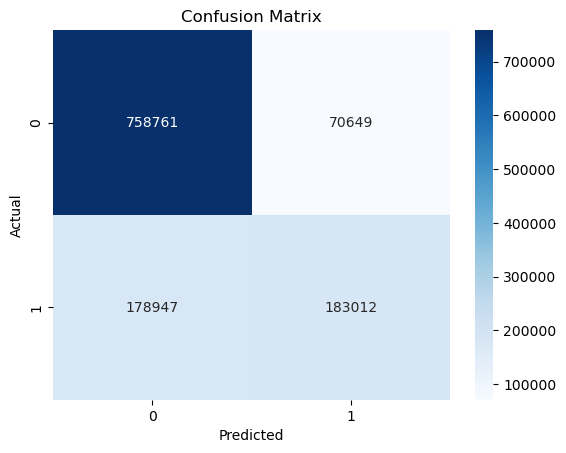

<Figure size 640x480 with 0 Axes>

In [46]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('my_plot.png')

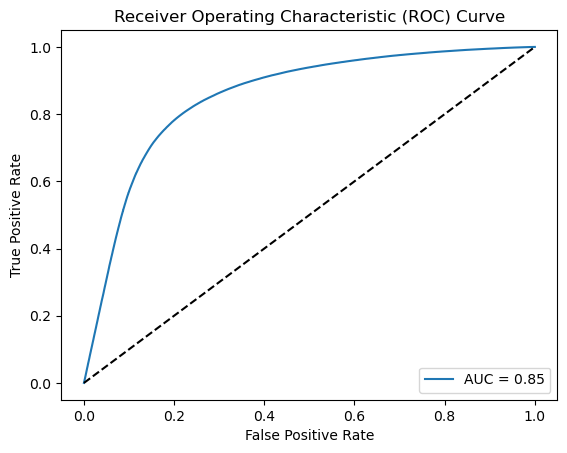

<Figure size 640x480 with 0 Axes>

In [47]:

# Calculate the probabilities for each class
y_prob = model_lr.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
plt.savefig('my_plot2.png')


## Random Forest

In [48]:
# Create a Random Forest classifier
start_time = time.time()
model_rf = RandomForestClassifier(n_estimators=50, random_state=42)

# Fit the model on the training data
model_rf.fit(X_train_scaled, y_train)
train_time = time.time()-start_time

In [49]:
# Save the trained model to the Kaggle Outputs folder
filename = 'Random_forest.pkl'
output_path = '/kaggle/working/'  # This is the path to the Kaggle Outputs folder

with open(os.path.join(output_path, filename), 'wb') as file:
    pickle.dump(model_rf, file)

In [ ]:
# file_path = '/kaggle/input/water-qualit-prediction-op/Random_forest.pkl'

# with open(file_path, 'rb') as file:
#     loaded_model = pickle.load(file)


In [50]:
# Make predictions on the test data
start_time = time.time()
y_pred = model_rf.predict(X_test_scaled)
predict_time = time.time()-start_time

print("Train Time : ", train_time, "\nTest Time : ", predict_time)

Train Time :  1109.3932938575745 
Test Time :  18.66608428955078


In [51]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.740452800111334
Recall: 0.9701623664558693


In [52]:
df_cleaned = df1.dropna()
df_cleaned = df_cleaned.compute()

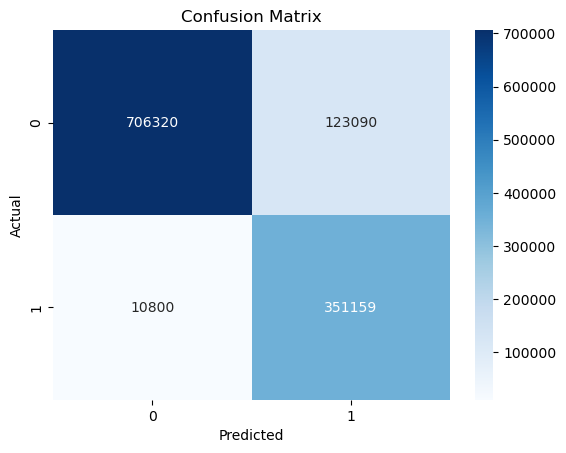

<Figure size 640x480 with 0 Axes>

In [53]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('my_plot.png')

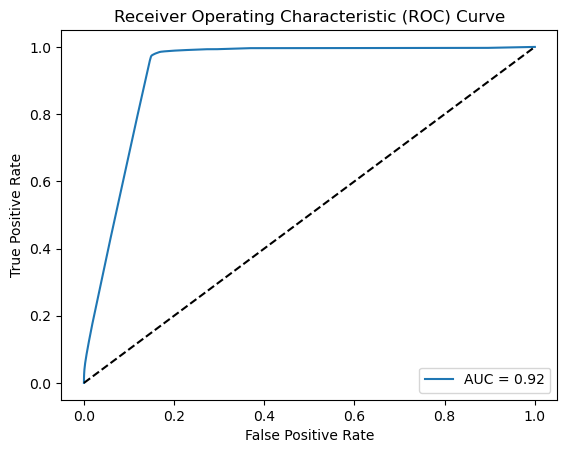

<Figure size 640x480 with 0 Axes>

In [54]:

# Calculate the probabilities for each class
y_prob = model_rf.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
plt.savefig('my_plot2.png')


## XG Boost

In [39]:
# Create a XGBoost
start_time = time.time()
model_xg = xgb.XGBClassifier(n_estimators = 50, random_state = 42)

# Fit the model on the training data
model_xg.fit(X_train_scaled, y_train)
train_time = time.time()-start_time

In [ ]:
# Save the trained model to the Kaggle Outputs folder
filename = 'XGBoost.pkl'
output_path = '/kaggle/working/'  # This is the path to the Kaggle Outputs folder

with open(os.path.join(output_path, filename), 'wb') as file:
    pickle.dump(model_xg, file)

In [40]:
# Make predictions on the test data
start_time = time.time()
y_pred = model_xg.predict(X_test_scaled)
predict_time = time.time()-start_time

print("Train Time : ", train_time, "\nTest Time : ", predict_time)

Train Time :  270.5013678073883 
Test Time :  0.9178197383880615


In [41]:
# Calculate precision and recall
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)


Precision: 0.7285441671841132
Recall: 0.887248764597691


In [32]:
df_cleaned = df1.dropna()
df_cleaned = df_cleaned.compute()

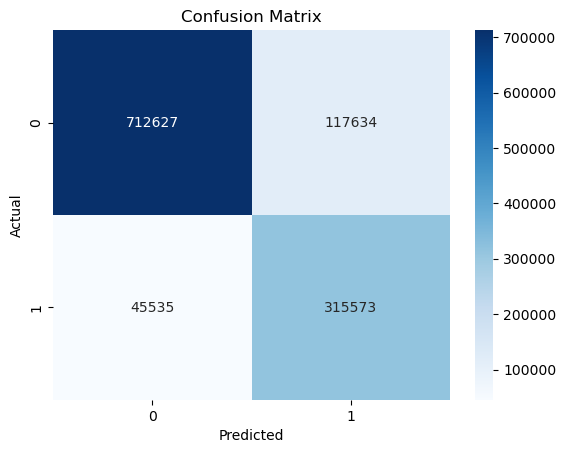

<Figure size 640x480 with 0 Axes>

In [33]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
plt.savefig('my_plot.png')

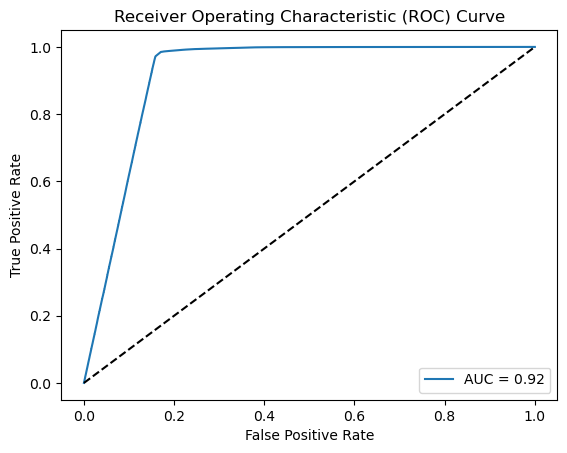

<Figure size 640x480 with 0 Axes>

In [34]:

# Calculate the probabilities for each class
y_prob = model_xg.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()
plt.savefig('my_plot2.png')
